
      Question 1 a and b:
      Data is plotted. Outputs are:
      1) Weight vector [ 6.         -0.3699036  31.62010643] and number of updates required by PLA 8
      2) Weight vector obtained through linear regression line [[ 0.24321905]
 [-0.00924817]
 [ 0.07719484]] 
      3) Linear regression and PLA hypotheis plots is shown below
      


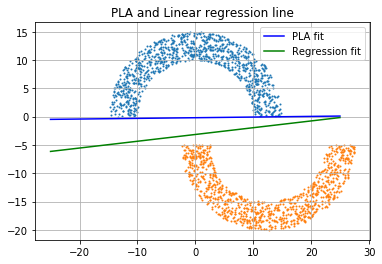

In [26]:
# Question 1

import random
import numpy as np
import matplotlib.pyplot as plt

# parameters
rad = 10
thk = 5
sep = 5

# define functions 
# n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        # uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top, bottom


# Define Sign Function 
def sign(w, x):
    s = np.sign(np.dot(w,x))
    return s if s != 0 else 1

def train_perceptron(data):
    # Declare variables for perceptron 
    wt = np.array([0,0,0])
    update_flag = True
    number_of_updates = 0
    
    # Exit while loop when there is no update on weight vector
    while update_flag:
        for d in data:
            update_flag = False
            label = d[3]
            features = d[:3]
            # Check sign of data point and update the weight vector
            if sign(wt, features) !=label:
                # print("features ",features)
                # print("wt ",wt)
                wt_next = wt + label*features
                wt = wt_next
                # print("wt_next ",wt_next)
                number_of_updates +=1
                update_flag = True
                # plot_perceptron(data, wt, number_of_updates)
                break # break the loop to run new search for the misclassified data point 
    return wt, number_of_updates

# reorganize data and randomize
top, bottom = generatedata(rad,thk,sep,2000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2

data = np.array(data)
np.random.shuffle(data)

# Perceptron Learning Algorithm:        
X_val = np.arange(-25,25,0.05)
# len(X_val)
Y_val = np.array([(X_val[i]*w[1]+w[0])/(-w[2]) for i in range(len(X_val))])

plt.plot(X_val, Y_val, color = 'b', label = "PLA fit")


# Linear Regression Fit 
Matrix = np.asmatrix(data)
X = Matrix[:,:3]
y = Matrix[:,3]

# Psudo_X = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X))
# Psudo_X
# W_lin = np.array(np.dot(Psudo_X,y))

Psudo_X = np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X))
W_lin = np.array(np.matmul(Psudo_X,y))


plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)

X3=np.arange(-25,25,0.05) 
Y3=np.array([(X3[i]*W_lin[1]+W_lin[0])/(-W_lin[2]) for i in range(len(X3))])

print("""
      Question 1 a and b:
      Data is plotted. Outputs are:
      1) Weight vector %s and number of updates required by PLA %s
      2) Weight vector obtained through linear regression line %s 
      3) Linear regression and PLA hypotheis plots is shown below
      """%(w, nu, W_lin))

plt.plot(X3,Y3, color = "g", label = "Regression fit")
plt.title("PLA and Linear regression line")
plt.legend()
plt.grid()
plt.show()




